<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Combinació de classificadors: Boosting</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>PID_00233252</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Xavier Duran Albareda <span style="margin-left: 30px;">Coordinació: Julià Minguillón</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducció

En aquest exemple, adaptat del llibre [Minería de datos, algoritmos y modelos](http://oer.uoc.edu/libroMD/), es mostra com generar un classificador arbre de decisió i com millorar-lo amb tècniques de boosting.

Les dades analitzades corresponen al _dataset_ [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

### Instal·lar els paquets necessaris en cas de no tenir-los

In [1]:
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
set.seed(17)

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Loading required package: C50
Loading required package: plyr


### Càrrega de les dades

In [2]:
wdbc=read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",",
    header=FALSE)
dim(wdbc)

[1] 699  11

### Preparació de les dades

In [3]:
wdbc$V7[wdbc$V7 == '?'] <- NA
wdbc$V7 <- as.numeric(wdbc$V7)
wdbc=wdbc[complete.cases(wdbc),]
dataset <- wdbc[,(2:11)]

### Paràmetres de creació del model

Utilitzarem la mètrica _Accuracy_ que mesura el percentatge d'instàncies correctes sobre el total. Farem la validació creuada o _crossvalidation_ amb 10 _folds_.

In [4]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)
metric <- "Accuracy"
grid <- expand.grid( .winnow = c(FALSE), .trials=c(1,5,10,15,25,50,75,100), .model="tree" )

### Creem un model d'arbre amb el mètode de boosting

In [5]:
model.boost <- train(as.factor(V11)~., tuneGrid=grid,data=dataset, method="C5.0",metric=metric, trControl=control)

### Matriu de confusió

In [6]:
confusionMatrix(model.boost)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction  2  4
         2 63  1
         4  2 34
                            
 Accuracy (average) : 0.9693


###  Mostrem les característiques del model

In [7]:
print(model.boost)

C5.0 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 615, 615, 615, 614, 615, 614, ... 
Resampling results across tuning parameters:

  trials  Accuracy   Kappa    
    1     0.9497365  0.8903500
    5     0.9585099  0.9089344
   10     0.9624459  0.9177447
   15     0.9624532  0.9178628
   25     0.9658490  0.9253875
   50     0.9663463  0.9265194
   75     0.9673267  0.9287255
  100     0.9692733  0.9331055

Tuning parameter 'model' was held constant at a value of tree
Tuning
 parameter 'winnow' was held constant at a value of FALSE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 100, model = tree and
 winnow = FALSE.


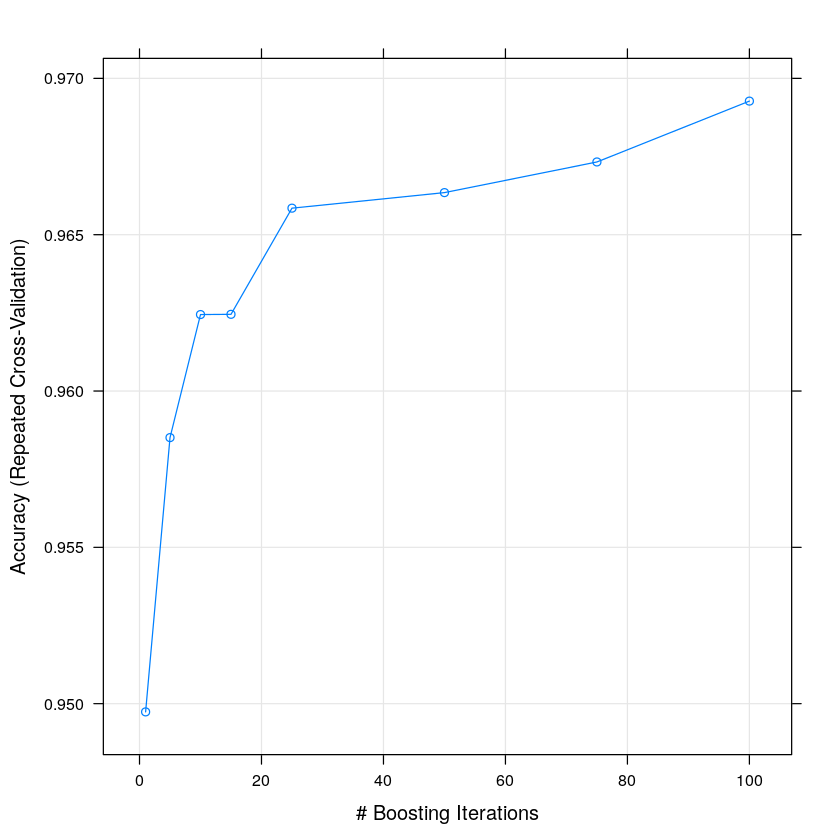

In [8]:
plot(model.boost)

<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->